In [1]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

# Dichiarazione Funzioni

In [25]:
def Errore_I(I):

    Err_I = (0.6/100)*I + 0.01
    return Err_I
    
def Errore_V(V, n = 0.06, h = 0.03):

    Err_V = (n/100)*V + h
    return Err_V
    
def Errore_R(I , V, R):

    err_V = Errore_V(V*1000)
    err_I = Errore_I(I)
    inc_V = err_V/V
    inc_I = err_I/I
    
    Err_R = np.sqrt(inc_V**2 + inc_I**2)*R

    return Err_R

def Leggi_File_excel(url, sheet_name = 0):

    response = requests.get(url)
    response.raise_for_status()

    excel_file = BytesIO(response.content)
    df = pd.read_excel(excel_file, sheet_name = sheet_name)
    return df

def rho_0(R, A, l):

    rho_0 =  R * (A/l)
    
    return rho_0


def Errore_Rho(inc_S, inc_L, inc_R, rho):

    Err_rho = np.sqrt(inc_S**2 + inc_L**2 + inc_R**2)*rho
    return Err_rho


def Resistenza(I, V):

    R = V/I
    return R

def Alpha(V, I, rho,S,L, delta_T):

    print(f"V: {V}\nI: {I}\nrho: {rho}\nS: {S}\nL: {L}\ndelta_T: {delta_T}")
    alpha = V*S
    alpha /= I*rho*L
    alpha -= 1
    
    alpha /= delta_T

    return alpha
    
def Linear_Fit(q, m, x):

    return q + m*x

def Errore_k(Inc_A, Inc_L, Inc_I, Inc_rho, k):

    Err_k = np.sqrt(Inc_A**2 + Inc_L**2 + Inc_I**2) + Inc_rho
    Err_k *= k

    return Err_k

def Errore_alpha(Inc_m, Inc_k, alpha):

    Err_alpha = np.sqrt(Inc_m**2 + Inc_k**2)*alpha

    return Err_alpha


    

# Filo 1

In [3]:
RHO = np.array([])
Err_RHO = np.array([]) 

rho: 8.14738684042361e-08 +/- 6.655024150226813e-10


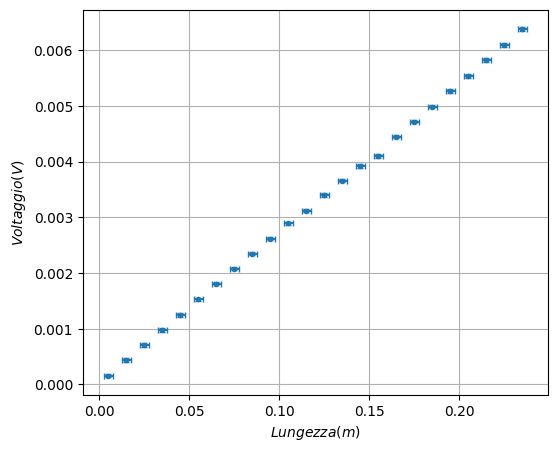

In [4]:

url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQConB6ptybnSInToNNbGmPNAb7ULY-_ohF0_XHVQoU6qiI?download=1"
df = Leggi_File_excel(url, 0)
#print(df)


Col_1 = 'V(V)'
Col_2 = 'L(m)'
Col_3 = 'S(m)'
Col_4 = 'T'
Col_5 = 'I (A)'

V = df[Col_1].to_numpy()
V = V[~np.isnan(V)]

L = df[Col_2].to_numpy()
L = L[~np.isnan(L)]

S = df[Col_3].to_numpy()
S = S[~np.isnan(S)]

T = df[Col_4].to_numpy()
T = T[~np.isnan(T)]

I = df[Col_5].to_numpy()
I = I[~np.isnan(I)]

#Parametri
R = Resistenza(I,V)
A = ((S/2)**2) * np.pi
rho = rho_0(R, A, L)
rho_m = rho.mean()
Err_Rho = np.std(rho, ddof = 1)/np.sqrt(len(rho))

#errori assoluti & Relativi

Err_mV = Errore_V(V*1000)
Err_V = Err_mV/1000

Err_I = Errore_I(I)
Err_L = 1e-2 * (0.5/2)
Err_S = 0.05/1000
Err_R = Errore_R(I, V, R)
Err_A = np.pi * S * Err_S

inc_S = Err_S/S
inc_L = Err_L/L
inc_R = Err_R/R
Err_rho = Errore_Rho(inc_S, inc_L, inc_R, rho)

#Params, cov = np.polyfit(L, V, 1, cov = True)
#m, q = Params
#y_fit = Linear_Fit(q,m,L)

#errori = np.sqrt(np.diag(cov))

#errore_m = errori[0]

print(f"rho: {rho_m} +/- {Err_Rho}")

RHO = np.append(RHO, rho_m)
Err_RHO = np.append(Err_RHO, Err_Rho)

T_0 = 25
delta_T = T - T_0

fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(L,V, xerr = Err_L, yerr = Err_V, fmt = '.', capsize = 2)
#ax.plot(L, y_fit)
ax.set_xlabel(r'$Lungezza(m)$')
ax.set_ylabel(r'$Voltaggio(V)$')
plt.grid(True)

# Filo 2

rho: 7.360426531410599e-08 +/- 4.562519430412113e-10


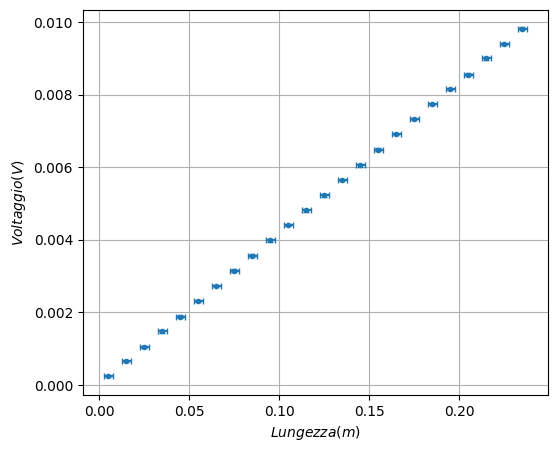

In [5]:

url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQConB6ptybnSInToNNbGmPNAb7ULY-_ohF0_XHVQoU6qiI?download=1"
df = Leggi_File_excel(url, 1)
#print(df)


Col_1 = 'V(V)'
Col_2 = 'L(m)'
Col_3 = 'S(m)'
Col_4 = 'T'
Col_5 = 'I (A)'

V = df[Col_1].to_numpy()
V = V[~np.isnan(V)]

L = df[Col_2].to_numpy()
L = L[~np.isnan(L)]

S = df[Col_3].to_numpy()
S = S[~np.isnan(S)]

T = df[Col_4].to_numpy()
T = T[~np.isnan(T)]

I = df[Col_5].to_numpy()
I = I[~np.isnan(I)]

#Parametri
R = Resistenza(I,V)
A = ((S/2)**2) * np.pi
rho = rho_0(R, A, L)
rho_m = rho.mean()
Err_Rho = np.std(rho, ddof = 1)/np.sqrt(len(rho))

#errori assoluti & Relativi

Err_mV = Errore_V(V*1000)
Err_V = Err_mV/1000

Err_I = Errore_I(I)
Err_L = 1e-2 * (0.5/2)
Err_S = 0.05/1000
Err_R = Errore_R(I, V, R)
Err_A = np.pi * S * Err_S

inc_S = Err_S/S
inc_L = Err_L/L
inc_R = Err_R/R
Err_rho = Errore_Rho(inc_S, inc_L, inc_R, rho)

#Params, cov = np.polyfit(L, V, 1, cov = True)
#m, q = Params
#y_fit = Linear_Fit(q,m,L)

#errori = np.sqrt(np.diag(cov))

#errore_m = errori[0]

print(f"rho: {rho_m} +/- {Err_Rho}")

RHO = np.append(RHO, rho_m)
Err_RHO = np.append(Err_RHO, Err_Rho)

T_0 = 25
delta_T = T - T_0

fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(L,V, xerr = Err_L, yerr = Err_V, fmt = '.', capsize = 2)
#ax.plot(L, y_fit)
ax.set_xlabel(r'$Lungezza(m)$')
ax.set_ylabel(r'$Voltaggio(V)$')
plt.grid(True)

# Filo 3

rho: 8.002514971944844e-08 +/- 5.836791031047716e-11


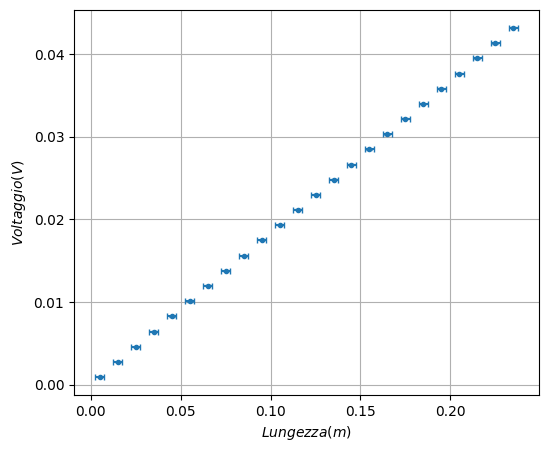

In [6]:

url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQConB6ptybnSInToNNbGmPNAb7ULY-_ohF0_XHVQoU6qiI?download=1"
df = Leggi_File_excel(url, 2)
#print(df)


Col_1 = 'V(V)'
Col_2 = 'L(m)'
Col_3 = 'S(m)'
Col_4 = 'T'
Col_5 = 'I (A)'

V = df[Col_1].to_numpy()
V = V[~np.isnan(V)]

L = df[Col_2].to_numpy()
L = L[~np.isnan(L)]

S = df[Col_3].to_numpy()
S = S[~np.isnan(S)]

T = df[Col_4].to_numpy()
T = T[~np.isnan(T)]

I = df[Col_5].to_numpy()
I = I[~np.isnan(I)]

#Parametri
R = Resistenza(I,V)
A = ((S/2)**2) * np.pi
rho = rho_0(R, A, L)
rho_m = rho.mean()
Err_Rho = np.std(rho, ddof = 1)/np.sqrt(len(rho))

#errori assoluti & Relativi

Err_mV = Errore_V(V*1000)
Err_V = Err_mV/1000

Err_I = Errore_I(I)
Err_L = 1e-2 * (0.5/2)
Err_S = 0.05/1000
Err_R = Errore_R(I, V, R)
Err_A = np.pi * S * Err_S

inc_S = Err_S/S
inc_L = Err_L/L
inc_R = Err_R/R
Err_rho = Errore_Rho(inc_S, inc_L, inc_R, rho)

#Params, cov = np.polyfit(L, V, 1, cov = True)
#m, q = Params
#y_fit = Linear_Fit(q,m,L)

#errori = np.sqrt(np.diag(cov))

#errore_m = errori[0]

print(f"rho: {rho_m} +/- {Err_Rho}")

RHO = np.append(RHO, rho_m)
Err_RHO = np.append(Err_RHO, Err_Rho)

T_0 = 25
delta_T = T - T_0

fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(L,V, xerr = Err_L, yerr = Err_V, fmt = '.', capsize = 2)
#ax.plot(L, y_fit)
ax.set_xlabel(r'$Lungezza(m)$')
ax.set_ylabel(r'$Voltaggio(V)$')
plt.grid(True)

# Filo 4

rho: 9.431210983968585e-08 +/- 2.1301864584695208e-10


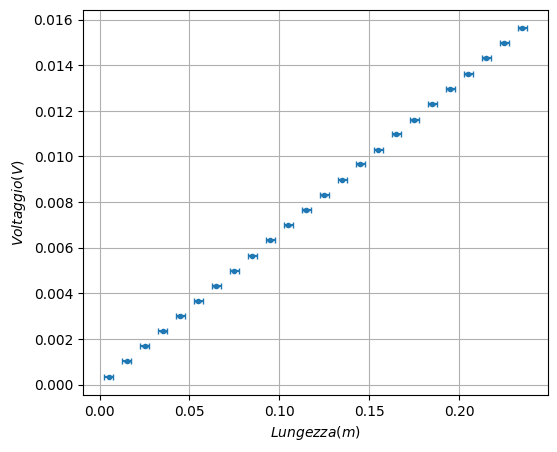

In [7]:

url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQConB6ptybnSInToNNbGmPNAb7ULY-_ohF0_XHVQoU6qiI?download=1"
df = Leggi_File_excel(url, 3)
#print(df)


Col_1 = 'V(V)'
Col_2 = 'L(m)'
Col_3 = 'S(m)'
Col_4 = 'T'
Col_5 = 'I (A)'

V = df[Col_1].to_numpy()
V = V[~np.isnan(V)]

L = df[Col_2].to_numpy()
L = L[~np.isnan(L)]

S = df[Col_3].to_numpy()
S = S[~np.isnan(S)]

T = df[Col_4].to_numpy()
T = T[~np.isnan(T)]

I = df[Col_5].to_numpy()
I = I[~np.isnan(I)]

#Parametri
R = Resistenza(I,V)
A = ((S/2)**2) * np.pi
rho = rho_0(R, A, L)
rho_m = rho.mean()
Err_Rho = np.std(rho, ddof = 1)/np.sqrt(len(rho))

#errori assoluti & Relativi

Err_mV = Errore_V(V*1000)
Err_V = Err_mV/1000

Err_I = Errore_I(I)
Err_L = 1e-2 * (0.5/2)
Err_S = 0.05/1000
Err_R = Errore_R(I, V, R)
Err_A = np.pi * S * Err_S

inc_S = Err_S/S
inc_L = Err_L/L
inc_R = Err_R/R
Err_rho = Errore_Rho(inc_S, inc_L, inc_R, rho)

#Params, cov = np.polyfit(L, V, 1, cov = True)
#m, q = Params
#y_fit = Linear_Fit(q,m,L)

#errori = np.sqrt(np.diag(cov))

#errore_m = errori[0]

print(f"rho: {rho_m} +/- {Err_Rho}")

RHO = np.append(RHO, rho_m)
Err_RHO = np.append(Err_RHO, Err_Rho)

T_0 = 25
delta_T = T - T_0

fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(L,V, xerr = Err_L, yerr = Err_V, fmt = '.', capsize = 2)
#ax.plot(L, y_fit)
ax.set_xlabel(r'$Lungezza(m)$')
ax.set_ylabel(r'$Voltaggio(V)$')
plt.grid(True)

# Filo 5

rho: 1.9692911439061495e-08 +/- 3.901682703871711e-10


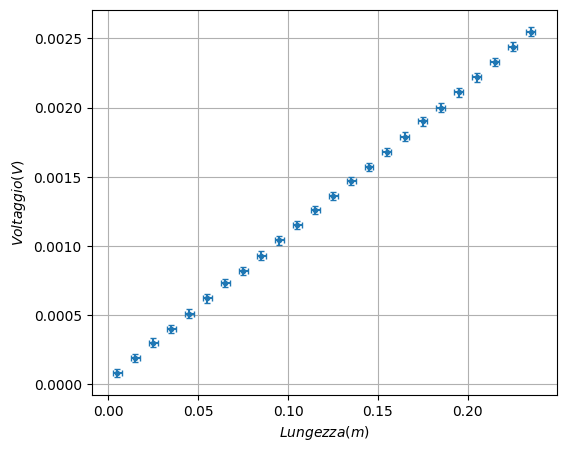

In [8]:

url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQConB6ptybnSInToNNbGmPNAb7ULY-_ohF0_XHVQoU6qiI?download=1"
df = Leggi_File_excel(url, 4)
#print(df)


Col_1 = 'V(V)'
Col_2 = 'L(m)'
Col_3 = 'S(m)'
Col_4 = 'T'
Col_5 = 'I (A)'

V = df[Col_1].to_numpy()
V = V[~np.isnan(V)]

L = df[Col_2].to_numpy()
L = L[~np.isnan(L)]

S = df[Col_3].to_numpy()
S = S[~np.isnan(S)]

T = df[Col_4].to_numpy()
T = T[~np.isnan(T)]

I = df[Col_5].to_numpy()
I = I[~np.isnan(I)]

#Parametri
R = Resistenza(I,V)
A = ((S/2)**2) * np.pi
rho = rho_0(R, A, L)
rho_m = rho.mean()
Err_Rho = np.std(rho, ddof = 1)/np.sqrt(len(rho))

#errori assoluti & Relativi

Err_mV = Errore_V(V*1000)
Err_V = Err_mV/1000

Err_I = Errore_I(I)
Err_L = 1e-2 * (0.5/2)
Err_S = 0.05/1000
Err_R = Errore_R(I, V, R)
Err_A = np.pi * S * Err_S

inc_S = Err_S/S
inc_L = Err_L/L
inc_R = Err_R/R
Err_rho = Errore_Rho(inc_S, inc_L, inc_R, rho)

#Params, cov = np.polyfit(L, V, 1, cov = True)
#m, q = Params
#y_fit = Linear_Fit(q,m,L)

#errori = np.sqrt(np.diag(cov))

#errore_m = errori[0]

print(f"rho: {rho_m} +/- {Err_Rho}")

RHO = np.append(RHO, rho_m)
Err_RHO = np.append(Err_RHO, Err_Rho)

T_0 = 25
delta_T = T - T_0

fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(L,V, xerr = Err_L, yerr = Err_V, fmt = '.', capsize = 2)
#ax.plot(L, y_fit)
ax.set_xlabel(r'$Lungezza(m)$')
ax.set_ylabel(r'$Voltaggio(V)$')
plt.grid(True)

# Filo 6

rho: 6.048768079611565e-08 +/- 5.93836760600151e-10


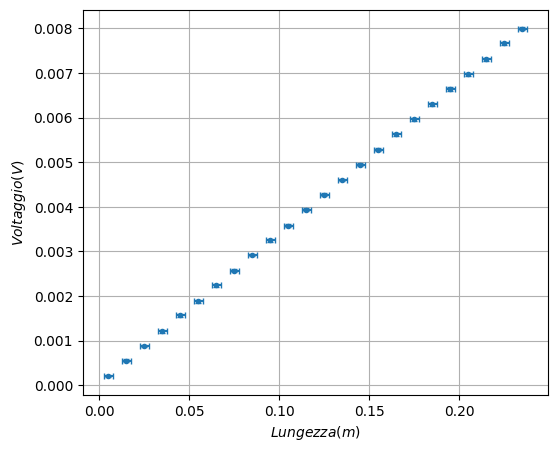

In [9]:

url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQConB6ptybnSInToNNbGmPNAb7ULY-_ohF0_XHVQoU6qiI?download=1"
df = Leggi_File_excel(url, 5)
#print(df)


Col_1 = 'V(V)'
Col_2 = 'L(m)'
Col_3 = 'S(m)'
Col_4 = 'T'
Col_5 = 'I (A)'

V = df[Col_1].to_numpy()
V = V[~np.isnan(V)]

L = df[Col_2].to_numpy()
L = L[~np.isnan(L)]

S = df[Col_3].to_numpy()
S = S[~np.isnan(S)]

T = df[Col_4].to_numpy()
T = T[~np.isnan(T)]

I = df[Col_5].to_numpy()
I = I[~np.isnan(I)]

#Parametri
R = Resistenza(I,V)
A = ((S/2)**2) * np.pi
rho = rho_0(R, A, L)
rho_m = rho.mean()
Err_Rho = np.std(rho, ddof = 1)/np.sqrt(len(rho))

#errori assoluti & Relativi

Err_mV = Errore_V(V*1000)
Err_V = Err_mV/1000

Err_I = Errore_I(I)
Err_L = 1e-2 * (0.5/2)
Err_S = 0.05/1000
Err_R = Errore_R(I, V, R)
Err_A = np.pi * S * Err_S

inc_S = Err_S/S
inc_L = Err_L/L
inc_R = Err_R/R
Err_rho = Errore_Rho(inc_S, inc_L, inc_R, rho)

#Params, cov = np.polyfit(L, V, 1, cov = True)
#m, q = Params
#y_fit = Linear_Fit(q,m,L)

#errori = np.sqrt(np.diag(cov))

#errore_m = errori[0]

print(f"rho: {rho_m} +/- {Err_Rho}")

RHO = np.append(RHO, rho_m)
Err_RHO = np.append(Err_RHO, Err_Rho)

T_0 = 25
delta_T = T - T_0

fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(L,V, xerr = Err_L, yerr = Err_V, fmt = '.', capsize = 2)
#ax.plot(L, y_fit)
ax.set_xlabel(r'$Lungezza(m)$')
ax.set_ylabel(r'$Voltaggio(V)$')
plt.grid(True)

# Filo 7

rho: 1.0032293228122106e-06 +/- 2.8714495666876255e-09


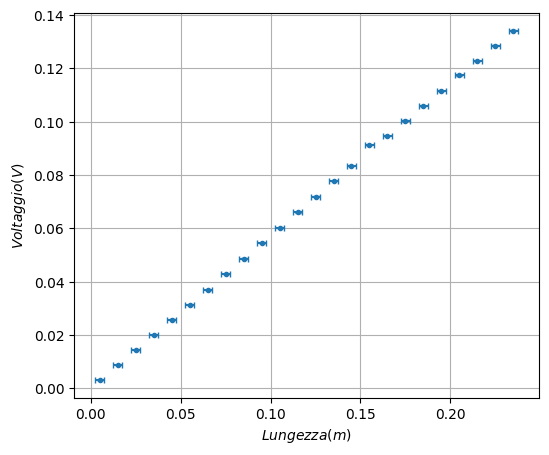

In [10]:

url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQConB6ptybnSInToNNbGmPNAb7ULY-_ohF0_XHVQoU6qiI?download=1"
df = Leggi_File_excel(url, 6)
#print(df)


Col_1 = 'V(V)'
Col_2 = 'L(m)'
Col_3 = 'S(m)'
Col_4 = 'T'
Col_5 = 'I (A)'

V = df[Col_1].to_numpy()
V = V[~np.isnan(V)]

L = df[Col_2].to_numpy()
L = L[~np.isnan(L)]

S = df[Col_3].to_numpy()
S = S[~np.isnan(S)]

T = df[Col_4].to_numpy()
T = T[~np.isnan(T)]

I = df[Col_5].to_numpy()
I = I[~np.isnan(I)]

#Parametri
R = Resistenza(I,V)
A = ((S/2)**2) * np.pi
rho = rho_0(R, A, L)
rho_m = rho.mean()
Err_Rho = np.std(rho, ddof = 1)/np.sqrt(len(rho))

#errori assoluti & Relativi

Err_mV = Errore_V(V*1000)
Err_V = Err_mV/1000

Err_I = Errore_I(I)
Err_L = 1e-2 * (0.5/2)
Err_S = 0.05/1000
Err_R = Errore_R(I, V, R)
Err_A = np.pi * S * Err_S

inc_S = Err_S/S
inc_L = Err_L/L
inc_R = Err_R/R
Err_rho = Errore_Rho(inc_S, inc_L, inc_R, rho)

#Params, cov = np.polyfit(L, V, 1, cov = True)
#m, q = Params
#y_fit = Linear_Fit(q,m,L)

#errori = np.sqrt(np.diag(cov))

#errore_m = errori[0]

print(f"rho: {rho_m} +/- {Err_Rho}")

RHO = np.append(RHO, rho_m)
Err_RHO = np.append(Err_RHO, Err_Rho)

T_0 = 25
delta_T = T - T_0

fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(L,V, xerr = Err_L, yerr = Err_V, fmt = '.', capsize = 2)
#ax.plot(L, y_fit)
ax.set_xlabel(r'$Lungezza(m)$')
ax.set_ylabel(r'$Voltaggio(V)$')
plt.grid(True)

# Filo 8

rho: 8.161371267664636e-07 +/- 2.7719439158961902e-09


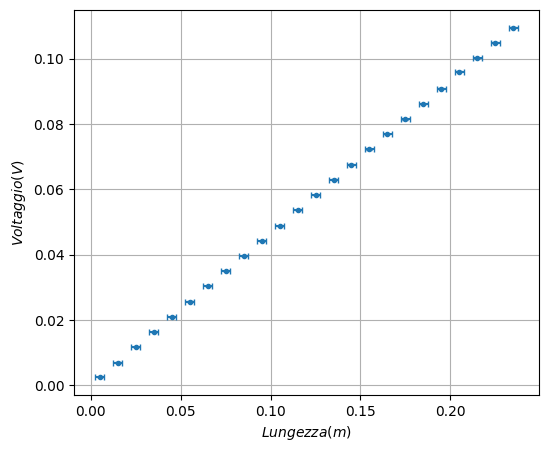

In [11]:

url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQConB6ptybnSInToNNbGmPNAb7ULY-_ohF0_XHVQoU6qiI?download=1"
df = Leggi_File_excel(url, 7)
#print(df)


Col_1 = 'V(V)'
Col_2 = 'L(m)'
Col_3 = 'S(m)'
Col_4 = 'T'
Col_5 = 'I (A)'

V = df[Col_1].to_numpy()
V = V[~np.isnan(V)]

L = df[Col_2].to_numpy()
L = L[~np.isnan(L)]

S = df[Col_3].to_numpy()
S = S[~np.isnan(S)]

T = df[Col_4].to_numpy()
T = T[~np.isnan(T)]

I = df[Col_5].to_numpy()
I = I[~np.isnan(I)]

#Parametri
R = Resistenza(I,V)
A = ((S/2)**2) * np.pi
rho = rho_0(R, A, L)
rho_m = rho.mean()
Err_Rho = np.std(rho, ddof = 1)/np.sqrt(len(rho))

#errori assoluti & Relativi

Err_mV = Errore_V(V*1000)
Err_V = Err_mV/1000

Err_I = Errore_I(I)
Err_L = 1e-2 * (0.5/2)
Err_S = 0.05/1000
Err_R = Errore_R(I, V, R)
Err_A = np.pi * S * Err_S

inc_S = Err_S/S
inc_L = Err_L/L
inc_R = Err_R/R
Err_rho = Errore_Rho(inc_S, inc_L, inc_R, rho)

#Params, cov = np.polyfit(L, V, 1, cov = True)
#m, q = Params
#y_fit = Linear_Fit(q,m,L)

#errori = np.sqrt(np.diag(cov))

#errore_m = errori[0]

print(f"rho: {rho_m} +/- {Err_Rho}")

RHO = np.append(RHO, rho_m)
Err_RHO = np.append(Err_RHO, Err_Rho)

T_0 = 25
delta_T = T - T_0

fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(L,V, xerr = Err_L, yerr = Err_V, fmt = '.', capsize = 2)
#ax.plot(L, y_fit)
ax.set_xlabel(r'$Lungezza(m)$')
ax.set_ylabel(r'$Voltaggio(V)$')
plt.grid(True)

# Resistività al variare di T usando il filo 5 (rame)

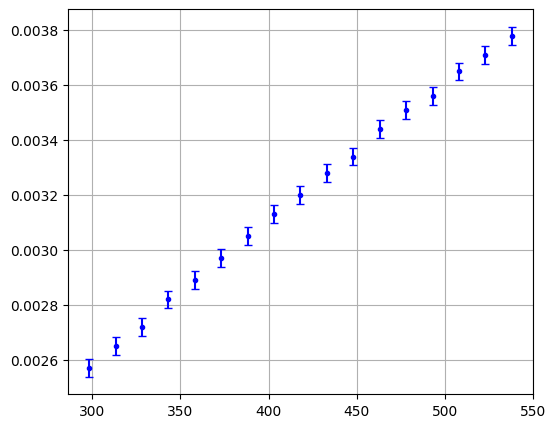

In [33]:

rho_r = RHO[4]
Err_rho_r = Err_RHO[4]
inc_rho_r = Err_rho_r/rho_r
url = "https://unipa-my.sharepoint.com/:x:/g/personal/mattia_tarantino02_you_unipa_it/IQConB6ptybnSInToNNbGmPNAb7ULY-_ohF0_XHVQoU6qiI?download=1"
df = Leggi_File_excel(url, 8)
#print(df)


Col_1 = 'V(mV)'
Col_2 = 'T (C)'
Col_3 = 'I(A)'
Col_4 = 'S(m)'
Col_5 = 'L(m)'

V_m = df[Col_1].to_numpy()
V_m = V_m[~np.isnan(V_m)]

V = V_m/1000

T = df[Col_2].to_numpy()
T = T[~np.isnan(T)]

T = T + 273.15

I = df[Col_3].to_numpy()
I = I[~np.isnan(I)]

D = df[Col_4].to_numpy()
D = D[~np.isnan(D)]

L = df[Col_5].to_numpy()
L = L[~np.isnan(L)]

delta_T = T

A = ((S/2)**2) * np.pi

#Errori ed incertezze

Err_mV = Errore_V(V_m)
Err_V = Err_mV/1000

Err_I = Errore_I(I)
Err_L = 1e-2 * (0.5/2)
Err_S = 0.05/1000
Err_A = np.pi * S * Err_S

inc_I = Err_I/I
inc_L = Err_L/L
inc_R = Err_R/R
inc_A = Err_A/A

fig, ax = plt.subplots(figsize = (6,5))

ax.errorbar(delta_T, V, yerr = Err_V, fmt = '.', color = 'blue',capsize = 3)
ax.grid(True)


[0.00057634]
[0.00043629]


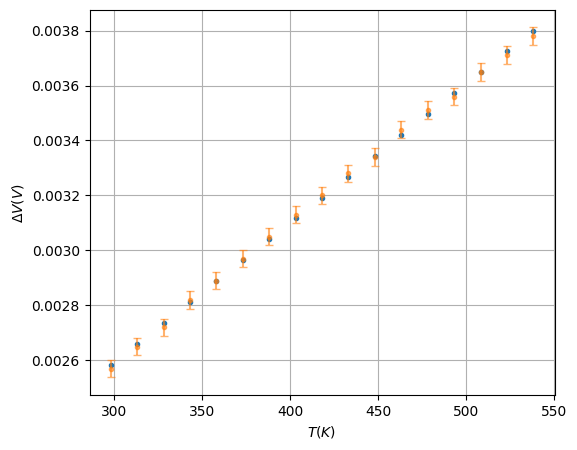

In [58]:

params , cov = np.polyfit(delta_T, V, 1, cov = True)
m, q = params

Err_m = np.sqrt(cov[0][0]) * 3

inc_m = Err_m/m

k = I*L * rho_r
k /= A
Err_k = Errore_k(Inc_A = inc_A, Inc_I = inc_I, Inc_L = inc_L, Inc_rho = inc_rho_r, k = k)
inc_k = Err_k/k

print(Err_k)

alpha = m
alpha /= k
Err_alpha = Errore_alpha(inc_m, inc_k, alpha)

print(Err_alpha)

y_fit = Linear_Fit(q, m, delta_T)

fig, ax = plt.subplots(figsize = (6,5))


ax.plot(delta_T, y_fit, ".", label = "Fit Lineare Ottenuta dai dati")

ax.errorbar(delta_T, V, fmt = ".", yerr = Err_V, label = "Dati", capsize = 3, alpha = 0.6 )
ax.set_xlabel(r'$T(K)$')
ax.set_ylabel(r'$\Delta V(V)$')
ax.grid(True)

